In [1]:
import pydicom
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

In [2]:
dcm = pydicom.dcmread('instance.dcm')

In [3]:
print(f'Modality: {dcm.Modality}')

Modality: CT


In [4]:
pixels = np.copy(dcm.pixel_array)
print(f'min: {np.min(pixels)}, max: {np.max(pixels)}')

min: -3024, max: 3071


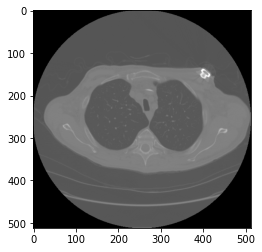

In [5]:
plt.imshow(pixels, cmap='gray')

In [6]:
wc = 2472
ww = 4144

In [7]:
hu_min = wc - ww/2
hu_max = wc + ww/2

In [8]:
pixels[np.where(pixels < hu_min)] = hu_min
pixels[np.where(pixels > hu_max)] = hu_max
pixels = (pixels - hu_min)/(hu_max - hu_min)

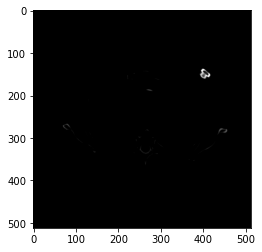

In [9]:
plt.imshow(pixels, cmap='gray')

In [10]:
print(f'min: {np.min(pixels)}, max: {np.max(pixels)}')

min: 0.0, max: 0.644546332046332


In [11]:
out = (pixels*0xff).astype(np.uint8)
im = Image.fromarray(out, mode='L')
im.save('out.png')